# Generating Every Rhythm

This is a notebook about generating every possible rhythm.

What does "every rhythm" even mean? Afterall, we can't just try to generate *every* every rhythm: there are infinite, infinitesimal adjustments and variations in timing which we could never account for in a computer program. But we *can* generate any rhythm within specific restrictions.

First of all, our rhythms need to be [quantized](#quantize). That way, we can get rid of all the infinitely tiny variations in timing that could occur. But we still have the problem that some of our rhythms will be infinitely long. That's why they also need to be at a set length. This length is arbitrary, and so is the quantization, but for the next few examples, it'll be 8 subdivisions per rhythm, like a bar of 4/4 time divided into 8th notes.

## Rationale

Why would we generate every rhythm?
- We can find new rhythms to incorporate in our compositions.
- We can search through all the rhythms to find ones with specific properties. Certain properties, like [well-formedness](#well-formed), can affect the musical character of a rhythm.
- We can perform operations that transform a chosen rhythm into a related one, perhaps to create a gradually evolving pattern for a composition.

Before we get started, let's install a couple libraries which will help the rest of the code run.

In [1]:
%pip install abjad-ext-ipython

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.9/533.9 kB 8.7 MB/s eta 0:00:00 MB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for abjad-ext-ipython: filename=abjad_ext_ipython-3.3-py3-none-any.whl size=3245 sha256=79358a354d96d8450470444e340ec249094549418ea1d6b8cfe555b155564727
  Stored in directory: /home/marc/.cache/pip/wheels/6d/59/28/f29562420ac79fb633facd87932df08a548c4134fd4be96ee7
  Created wheel for abjad: filename=abjad-3.3-py3-none-any.whl size=614029 sha256=9bd2625d418c5208fd722c3ce3fcde25a252eccf7d1cc0f20c91ae50d111c6a6
  Stored in directory: /home/marc/.cache/pip/wheels/bf/2b/03/3f7fa6ae0a65a24e63acc71171d89dca7d881de01ffc19d067
  Created wheel for uqbar: filename=uqbar-0.4.8-py3-none-any.whl size=82614 sha25

In [2]:
%load_ext abjadext.ipython

## Encoding Rhythms as Lists

Before we can generate every rhythm, we need to figure out a way to [encode](#encode) rhythms. 

Here's an example of a rhythm:
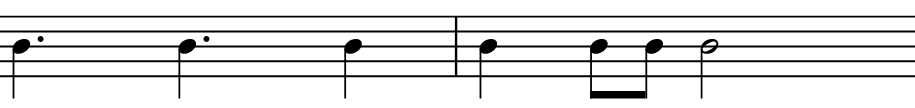
You may notice that this rhythm is already encoded for our convenience in traditional music notation. Unfortunately, although music notation is easier to write than pure sound, "easier" is relative, and this is still pretty tough for us to type out or Python to parse. We'll have to come up with an even easier representation. Languages like Python prefer to deal with strings (text) or lists of values, so that's what we want to represent this rhythm as.

But at this juncture, there are so many possibilities! To briefly showcase a few:
- We could represent each note as its length in sixteenth notes: `[6, 6, 4, 4, 2, 2, 8]`.
- We could assign each note a pair of numbers describing its length and its position in time (starting from 1): `[[1.5, 1], [1.5, 2.5], [1, 4], [1, 5], [0.5, 6], [0.5, 6.5], [2, 7]]`.
- We could make an eighth-note grid where note starts are represented by a capital Deseret letter Gay, and other beats by the lowercase of the same: `"𐐘𐑀𐑀𐐘𐑀𐑀𐐘𐑀𐐘𐑀𐐘𐐘𐐘𐑀𐑀𐑀"`,
- or we can try to replicate the music notation with what Unicode provides: `"♩.♩.♩♩♫♩͜♩"`,
- or we could rely on the most computer-ish of all, pure 0s and 1s: `"1001001010111000"`.

That last encoding, where each digit represents a point on the grid and 1 is the start of a new note, is actually one of the most useful. It misses one distinction, though: it can't differentiate between a rest and a held note.

For example, how do we differentiate between the rhythm above and the one below?

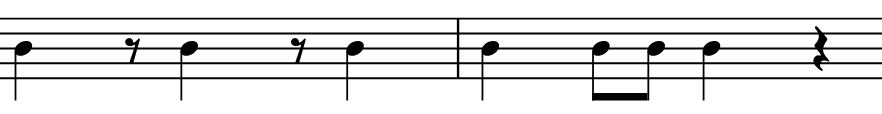

Of course, some real instruments (including most percussion) have the same limitation, but for the sake of thoroughness, we can adopt a new character: 2 will represent a sustaining of the previous note. Using this encoding, our original rhythm is `"1221221212111222"`, while the second rhythm would be `"1201201212111200"`

## Generating Rhythms as Lists

The next step after encoding is to actually generate our rhythms. We'll start with the simpler 0s and 1s encoding: how can we write a piece of code that makes every rhythm that that system can represent of a certain length?

There's a neat trick we can utilize for this called [recursion](#recursion). It's easier to generate every seven-note rhythm than every eight-note rhythm, and once we have every seven-note rhythm, we can just add either a 0 or a 1 to the end of each to have all our eight-note ones! And the way we get our seven-note rhythms is by adding a 0 or 1 to each six-note rhythm, et cetera, ad infinitum, turtles all the way down to the beginning: a single rhythm of length 0, consisting of no notes.

So how do we actually structure this in code?

We want to be able to get rhythms of an arbitrary length, so we'll start by defining a [function](#function) to do this.

```python
def get_rhythms_of_length(n):
    if n <=0:
        return [""]
```

Or in English: we define a function called `get_rhythms_of_length`. It takes a single variable, `n`, which represents the length of the rhythms we wish to generate. If the rhythm is 0 or negative subdivisions long, then the rhythm is empty, which makes sense - there's no beats. 


```python
    else:
        out = []
```

We start by creating an empty list to add our rhythms to.

```python
        for rhythm in get_rhythms_of_length(n - 1):
```
What we're doing here is called a "for loop". Essentially, we make a list, and then perform an action one time for every item on the list. In this case, we're doing the next couple of lines for every rhythm that's one subdivision shorter than the length we're looking at. "But wait," you ask, "don't we need to do the whole thing again as soon as we use the function inside itself? How does it ever get finished?" It does seem like we're going to keep looping forever. But every time we reach another layer of the function, we shorten the length by 1. So eventually, we'll get to a length of 0, and we can use the first half of the code instead of this half.

```python
            out.append(rhythm + "0")
            out.append(rhythm + "1")
        return out
```
Now that we have a foundation, we need to build back out from it. This bit relies on a little trick: every valid rhythm in this 0s and 1s format can end in either a 0 or a 1. If you remove that last digit, it'll still be a valid rhythm. So for every rhythm of length `n - 1`, we can make two rhythms of length `n`. Here, we do that to each rhythm of length `n - 1`, so we end up with every rhythm of length `n`.

Here's all of that again as a runnable block of code:

In [3]:
def get_rhythms_of_length(n):
    if n <= 0:
        return [""]
    else:
        out = []
        for rhythm in get_rhythms_of_length(n - 1):
            out.append(rhythm + "0")
            out.append(rhythm + "1")
        return out

Let's test it out by generating all rhythms of length 4:

In [4]:
get_rhythms_of_length(4)

['0000',
 '0001',
 '0010',
 '0011',
 '0100',
 '0101',
 '0110',
 '0111',
 '1000',
 '1001',
 '1010',
 '1011',
 '1100',
 '1101',
 '1110',
 '1111']

Here's a version of that same function with the full encoding that makes a distinction between sustains and rests:

In [5]:
def get_full_rhythms(n):
    if n <= 0:
        return [""]
    else:
        out = []
        for rhythm in get_full_rhythms(n - 1):
            if len(rhythm) == 0 or rhythm[-1] == "0":
                out.append(rhythm + "0")
                out.append(rhythm + "1")
            else:
                out.append(rhythm + "0")
                out.append(rhythm + "1")
                out.append(rhythm + "2")
        return out

Our new sustain character, 2, can only be added when there is a note playing, not after a rest. The line `if len(rhythm) == 0 or rhythm[-1] == "0":` checks whether the rhythm being extended is empty or if the last character of the rhythm is 0 (a rest). If so, you can only follow it with a 0 or 1; otherwise, you can also add the new sustain character, 2.

Let's test it out:

In [6]:
get_full_rhythms(4)

['0000',
 '0001',
 '0010',
 '0011',
 '0012',
 '0100',
 '0101',
 '0110',
 '0111',
 '0112',
 '0120',
 '0121',
 '0122',
 '1000',
 '1001',
 '1010',
 '1011',
 '1012',
 '1100',
 '1101',
 '1110',
 '1111',
 '1112',
 '1120',
 '1121',
 '1122',
 '1200',
 '1201',
 '1210',
 '1211',
 '1212',
 '1220',
 '1221',
 '1222']

## Displaying the Rhythms as Notation

The last step is to take these rhythms back from a computer encoding to a human encoding, that is, sheet music. To do this, we'll use the abjad library, which allows us to generate sheet music with LilyPond:

In [7]:
import abjad

abjad.show(abjad.Note('c4'))

The following function converts the encoded rhythm into a list of durations and pitches (we'll just use a D4 every time), which abjad can use to write the sheet music:

In [8]:
def get_durs_and_pitches_from_encoded_rhythm(rhythm):
    current_pitch = None
    current_dur = 0
    durations = []
    pitches = []
    for char in rhythm:
        if char == "0":
            if current_pitch is None:
                current_dur += 1
            else:
                if current_dur > 0:
                    durations.append(current_dur)
                    pitches.append(current_pitch)
                current_pitch = None
                current_dur = 1
        elif char == "1":
            if current_dur > 0:
                durations.append(current_dur)
                pitches.append(current_pitch)
            current_pitch = 2
            current_dur = 1
        elif char == "2":
            if current_pitch is None:
                raise ValueError("Invalid rhythm")
            else:
                current_dur += 1
    durations.append(current_dur)
    pitches.append(current_pitch)
    durations = [(d, 8) for d in durations]
    return durations, pitches

The details of how it works are beyond the scope of this notebook, but essentially it's reading through the encoding character by character and using what it sees to build a list of durations and pitches.

Finally, this next function calls the previous function and then invokes the full powers of abjad to render the list of pitches and durations as visible sheet music:

In [9]:
def display_on_staff(rhythm):
    durations, pitches = get_durs_and_pitches_from_encoded_rhythm(rhythm)
    notes = abjad.LeafMaker()(pitches, durations)
    staff = abjad.Staff([notes])
    abjad.show(staff) 

Let's try it out for the rhythm from earlier:

In [10]:
display_on_staff("1201201212111200")

## Final Demonstration: Displaying Random Rhythms

Let's bringing it all together by picking a random rhythm and displaying it as human-readable sheet music. All we need to do is import the python random library, and then combine its `choice` function with our previous functions to generate rhythms and display them as notation:

In [16]:
import random

display_on_staff(random.choice(get_full_rhythms(8)))

## Glossary

#### well-formed
this concept is complicated and optional to your reading experience, so proceed at your own risk

A polyrhythm is two steady beats at different speeds playing at the same time. If the speeds have an integer ratio, they can be represented as subsets of a single larger measure length; for example 3:2 works on a 6-beat measure. However, the most common measure length in Western music is 8. So the only polyrhythms are trivial cases like 2:1, 4:1 and of course 8:1. The solution? Well-formed rhythms. A well-formed rhythm is like a polyrhythm that wraps around at one of the beats.

A well-formed rhythm is built by two lengths of note. One of them is considered the measure, or the length of the overall rhythm. The other one is known as the "generator". You construct a well-formed rhythm by repeating notes a generator apart, reducing by one measure whenever you pass it, until you form a rhythm with exactly two beat lengths. For example, here's the building of a well-formed rhythm with a measure of 8 subdivisions and a generator of 3.

00000000 - base rhythm

12200000 - added first generator

12212200 - second generator

12212212 - third generator, and a well-formed rhythm. Note that this is the half clave!

11212212 - fourth generator; we've wrapped back around to the start of the measure.

11211212 - the final rhythm.
#### quantize
Let's say you're trying to share a picture of your food on social media (bear with me). The food is detailed to the level of atoms, but your phone can't store and use a picture that detailed, and your eyes can't percieve that level of detail either. So instead, the image you take has a lower resolution than reality, and is made of a grid of different pixels.
We have the same issue with rhythms: there are infinite subtle variations in any rhythm, which a computer can't deal with and the ear can't percieve. So, we'll make all our rhythms out of a grid of steady underlying pulses, like 8th or 16th notes in standard music notation. That makes the size manageable and ensures that each rhythm will sound distinct. *Making a rhythm conform to an underlying grid is called quantizing it.*
#### encode
Everything on a computer is ultimately made of 0s and 1s. However, as humans, we can't parse that; we want to communicate with each other using words, sounds, and images. We compromise with computers by coming up with ways to represent our data (words, sounds, images) in 0s and 1s. For example, using Unicode, your computer will display a particular series of 0s and 1s as a character. Similarly, there are ways to store images by describing the color of each pixel in 0s and 1s, or use more complicated methods like describing the location of each image element. *The process of representing data for humans in a way that's easier for computers is encoding.*
#### recursion
Recursion is when something is defined in terms of itself. Take the construction of a Sierpinski gasket. You start with a triangle.
```
   /\
  /  \
 /    \
/______\
```
This is stage 1. To make the next stage, place a down-pointing triangle inside every up-pointing triangle in the previous stage.
```
   /\
  /__\
 /\  /\
/__\/__\
```
By repeating this step, you continually add detail to the starting fractal.